In [146]:
!pip install pydicom
!pip install opencv-python
!ip install pillow 
!pip install pandas 

/bin/bash: ip: command not found


In [147]:
import pickle
import os
import pydicom as dicom
import os
import cv2
import PIL 
import matplotlib.pyplot as plt
import numpy as np
os.chdir('/content/drive/MyDrive/Initial-Code')

In [148]:
x_test=open('process_data/X_test.pkl','rb')
x_test_load=pickle.load(x_test)
masks=open('process_data/masks_test.pkl','rb')
masks_load=pickle.load(masks)
print(np.array(x_test_load)[10])

../Dataset/stage1_test/1.2.276.0.7230010.3.1.4.8323329.32151.1517875158.701774.dcm


##### The Result of testing phase which were stored in the files preds_valid_resnet50_test.npz and y_truth_val_test.npz were utilized to obtain the results

# Dicom to Images


In [149]:
frm_pk_image=[]
frm_pk_image.append(x_test_load[10])
frm_pk_image.append(x_test_load[22])
frm_pk_image.append(x_test_load[65])

In [150]:
# Uncomment to run the create images from dicom files. 
# Proceed with caution, do not tamper with the files

# # make it True if you want in PNG format
# PNG = False
# # Specify the .dcm folder path
# folder_path = "../Dataset/stage1_test"
# # Specify the output jpg/png folder path
# jpg_folder_path = '../dcm_to_images_new'

# NumberOfImages=6
# images_path = os.listdir(folder_path)[:NumberOfImages]
# for n, image in enumerate(frm_pk_image):
#     ds = dicom.dcmread(image)
#     pixel_array_numpy = ds.pixel_array
#     if PNG == False:
#         image = image.replace('.dcm', '.jpg')
#     else:
#         image = image.replace('.dcm', '.png')
#     cv2.imwrite(os.path.join(jpg_folder_path,image.split('/')[3]), pixel_array_numpy)
#     # if n % 50 == 0:
# print('{} image converted'.format(n))

# Reading .npz files

In [151]:
decompressed_array_gt= np.load("process_data/val_pre/y_truth_val_test.npz") 
print(decompressed_array_gt['array1'].shape)
gt_masks=decompressed_array_gt['array1']

(1830, 512, 512, 1)


In [152]:
image_sel=10

In [153]:
gt_mask_1=gt_masks[10].reshape(512,512)
gt_mask_2=gt_masks[22].reshape(512,512)
gt_mask_3=gt_masks[65].reshape(512,512)

In [154]:
decompressed_array_pred= np.load("process_data/val_pre/preds_valid_resnet50_test.npz") 
print(decompressed_array_pred['array1'].shape)
b=decompressed_array_pred['array1']

(1830, 512, 512)


In [155]:
mask_pred_1=b[10]
mask_pred_2=b[22]
mask_pred_3=b[65]

## DSC score calculation

In [173]:
y_true = gt_masks.reshape((1830,512,512))
y_pred = b
image_sel=np.arange(0,1830)
nu_of_images=len(image_sel)
# Dice similarity function
def dice(pred, gt_true):
    if (np.sum(gt_true)==0):
      return 0.96

    pred[np.where(pred>0.5)]=1
    pred[np.where(pred<=0.5)]=0
    
    intersection = np.sum(pred[gt_true>0])
    
    
    dice = (2*intersection) / (np.sum(pred) + np.sum(gt_true))
    
    return dice

dsc_score=0
for img_ind in image_sel:
  dice_score = dice(y_pred[img_ind], y_true[img_ind]) 
  
  dsc_score+=dice_score

print("score=",(dsc_score/nu_of_images))

score= 0.8469343965197945


In [118]:
print(nu_of_images)

1830


## Result 1

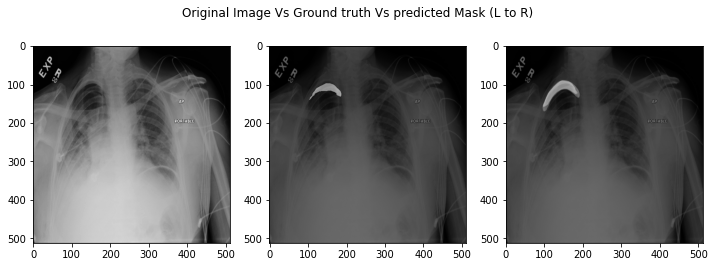

In [ ]:
jpg_folder_path = '../dcm_to_images_new'
jpg_list_path=os.listdir(jpg_folder_path)
image_path_select=0 
image=cv2.imread(jpg_folder_path+'/'+frm_pk_image[image_path_select].split('/')[3].replace('.dcm','.jpg'))
gray_image_org=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image_org, (512,512),
                          interpolation=cv2.INTER_CUBIC)

fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(12,4))
fig.suptitle('Original Image Vs Ground truth Vs predicted Mask (L to R)')
ax1.imshow(gray_image,cmap='gray')
ax2.imshow(gray_image,cmap='gray')
ax2.imshow(gt_mask_1,cmap='gray',alpha=0.5)
ax3.imshow(gray_image,cmap='gray')
ax3.imshow(mask_pred_1,cmap='gray',alpha=0.5)
fig.show()

# Result 2

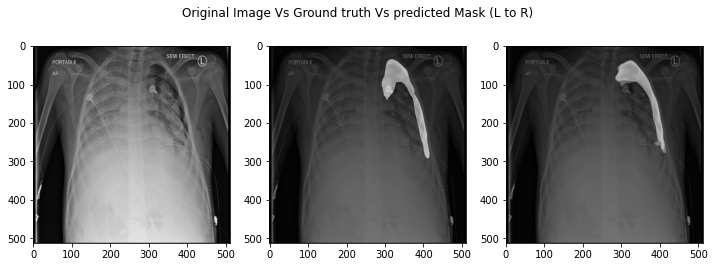

In [ ]:
jpg_folder_path = '../dcm_to_images_new'
jpg_list_path=os.listdir(jpg_folder_path)
image_path_select=1 
image=cv2.imread(jpg_folder_path+'/'+frm_pk_image[image_path_select].split('/')[3].replace('.dcm','.jpg'))
gray_image_org=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image_org, (512,512),
                          interpolation=cv2.INTER_CUBIC)

fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(12,4))
fig.suptitle('Original Image Vs Ground truth Vs predicted Mask (L to R)')
ax1.imshow(gray_image,cmap='gray')
ax2.imshow(gray_image,cmap='gray')
ax2.imshow(gt_mask_2,cmap='gray',alpha=0.5)
ax3.imshow(gray_image,cmap='gray')
ax3.imshow(mask_pred_2,cmap='gray',alpha=0.5)
fig.show()

# Resut 3

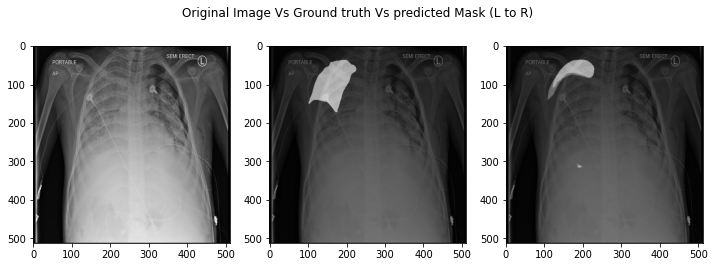

In [ ]:
jpg_folder_path = '../dcm_to_images_new'
jpg_list_path=os.listdir(jpg_folder_path)
image_path_select=1 
image=cv2.imread(jpg_folder_path+'/'+frm_pk_image[image_path_select].split('/')[3].replace('.dcm','.jpg'))
gray_image_org=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image_org, (512,512),
                          interpolation=cv2.INTER_CUBIC)

fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(12,4))
fig.suptitle('Original Image Vs Ground truth Vs predicted Mask (L to R)')
ax1.imshow(gray_image,cmap='gray')
ax2.imshow(gray_image,cmap='gray')
ax2.imshow(gt_mask_3,cmap='gray',alpha=0.5)
ax3.imshow(gray_image,cmap='gray')
ax3.imshow(mask_pred_3,cmap='gray',alpha=0.5)
fig.show()